In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score

밀도 기반 클러스터링(Density-Based Spatial Clustering of Applications with Noise, DBSCAN)

밀도 기반 클러스터링은 데이터의 공간을 다루는 알고리즘으로 전체 공간에서 데이터가 가장 밀집된 영역을 찾는다. 그 밀집된 영역이 하나의 클러스터가 되며, 밀집 정도가 낮은 영역을 클러스터 외부 영역으로 구분한다. 이때, 밀집 정도를 파악하기 위해서 데이터 포인트간 거리를 측정하게 되는데, 거리를 어떤 방법으로 측정하느냐에 따라 클러스터링 형태가 달라진다.

거리 측정 방법은 밀도 기반 클러스터링 객체를 생성할 때 조절 가능하며, 기본값은 유클리드 거리를 사용한다. 클러스터의 개수를 사전에 정하지 않아도 된다.

밀도 기반 클러스터링의 핵심 아이디어는 일정 반경 내에 최소한의 데이터 포인트 개수 이상이 존재한다는 것으로 반경의 최소한의 데이터 포인트 개수가 밀도 기반 클러스터링의 필수 요소이다.

밀도 기반 클러스터링 알고리즘을 활용해서 주어진 데이터를 클러스터링 해본다.

데이터 불러오기

In [2]:
# make_moons() 메소드로 사이킷런이 제공하는 초승달 모양의 클러스터가 2개인 데이터를 랜덤으로 불러온다.
# n_samples 속성의 기본값은 100이고 랜덤으로 불러올 데이터의 개수를 지정한다.
# random_state 속성값을 지정하면 매번 같은 배열의 데이터를 불러온다.
# noise 속성으로 데이터가 흩어지는 정도를 지정한다.
x_train, y_train = datasets.make_moons(n_samples=300, random_state=10, noise=0.05)
print(x_train.shape, y_train.shape)
for i in range(len(x_train))[:5]:
    print(x_train[i], y_train[i])

(300, 2) (300,)
[0.83185782 0.43093053] 0
[0.11570552 0.89804984] 0
[-0.61145931  0.72937325] 0
[ 1.65639775 -0.21176056] 1
[ 0.26223864 -0.2998983 ] 1


클러스터링 되지 않은 데이터 시각화

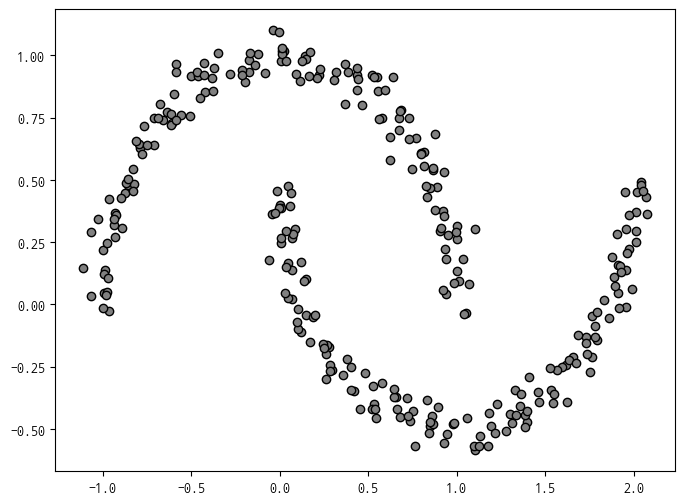

In [3]:
plt.figure(figsize=[8, 6])
plt.scatter(x_train[:, 0], x_train[:, 1], c='gray', edgecolors='black', marker='o')
plt.show()

k평균 클러스터링 모델 생성 후 데이터 학습 및 시각화

In [4]:
from sklearn.cluster import KMeans # k평균 클러스터링 알고리즘을 사용하기 위해 import 한다.
# n_clusters 속성에 클러스터링 개수를 지정해서 k평균 클러스터링 모델을 만든다.
cluster = KMeans(n_clusters=2, init='random', max_iter=100, random_state=0)
# 학습 데이터로 k평균 클러스터링 모델을 학습시킨다.
cluster.fit(x_train)

KMeans(init='random', max_iter=100, n_clusters=2, random_state=0)

In [5]:
# 클러스터링 결과(레이블)를 확인한다.
# labels_ 속성으로 클러스터링 결과를 확인할 수 있다.
print(cluster.labels_)

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0
 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0
 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1
 1 0 1 0]


In [6]:
# 클러스터링된 데이터 시각화를 위해 데이터프레임을 만든다.
x_train_df = pd.DataFrame(x_train, columns=['x', 'y'])
x_train_df['label'] = y_train
x_train_df['cluster'] = cluster.labels_ # 데이터프레임에 클러스터링된 레이블을 넣어준다.
x_train_df

,x,y,label,cluster
0,0.831858,0.430931,0,0
1,0.115706,0.898050,0,1
2,-0.611459,0.729373,0,1
3,1.656398,-0.211761,1,0
4,0.262239,-0.299898,1,1
...,...,...,...,...
295,0.062868,0.447505,1,1
296,-0.859324,0.503234,0,1
297,0.935721,0.221339,0,0
298,-0.828297,0.455657,0,1


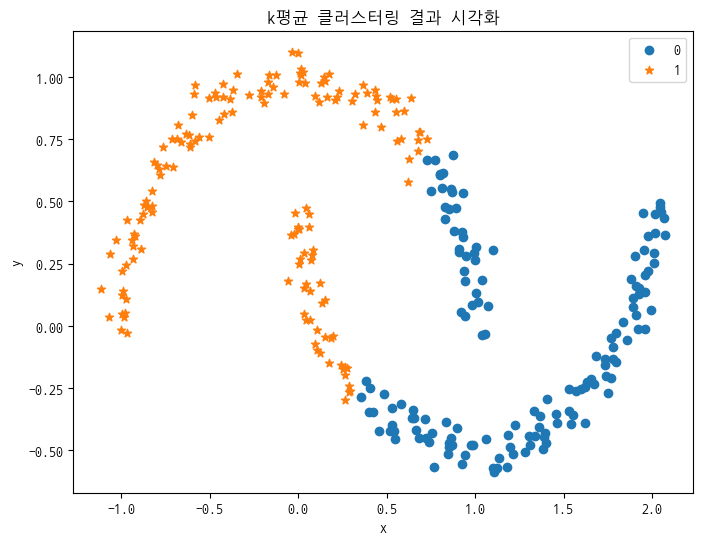

In [7]:
plt.figure(figsize=(8, 6))
markers = ['o', '*', '^', 'x', 's', 'v']

for i in set(x_train_df.cluster):
    df_index = x_train_df[x_train_df.cluster == i] # 클러스터링 결과 별로 데이터를 분할한다.
    x = df_index.x # 학습 데이터의 첫 번째 성분 벡터를 추출한다.
    y = df_index.y # 학습 데이터의 두 번째 성분 벡터를 추출한다.
    plt.scatter(x=x, y=y, marker=markers[i], label=i) # 산포도를 그린다.

plt.title('k평균 클러스터링 결과 시각화')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

병합 계층 클러스터링 모델 생성 후 데이터 학습 및 시각화

In [8]:
from sklearn.cluster import AgglomerativeClustering # 병합 계층 클러스터링 알고리즘을 사용하기 위해 import 한다.
# n_clusters 속성에 클러스터링 개수를 지정해서 병합 계층 클러스터링 모델을 만든다.
cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')
# 학습 데이터로 병합 계층 클러스터링 모델을 학습시킨다.
cluster.fit(x_train)

AgglomerativeClustering(linkage='complete')

In [9]:
# 클러스터링 결과(레이블)를 확인한다.
# labels_ 속성으로 클러스터링 결과를 확인할 수 있다.
print(cluster.labels_)

[0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 1]


In [10]:
# 클러스터링된 데이터 시각화를 위해 데이터프레임을 만든다.
x_train_df = pd.DataFrame(x_train, columns=['x', 'y'])
x_train_df['label'] = y_train
x_train_df['cluster'] = cluster.labels_ # 데이터프레임에 클러스터링된 레이블을 넣어준다.
x_train_df

,x,y,label,cluster
0,0.831858,0.430931,0,0
1,0.115706,0.898050,0,0
2,-0.611459,0.729373,0,0
3,1.656398,-0.211761,1,1
4,0.262239,-0.299898,1,0
...,...,...,...,...
295,0.062868,0.447505,1,0
296,-0.859324,0.503234,0,0
297,0.935721,0.221339,0,0
298,-0.828297,0.455657,0,0


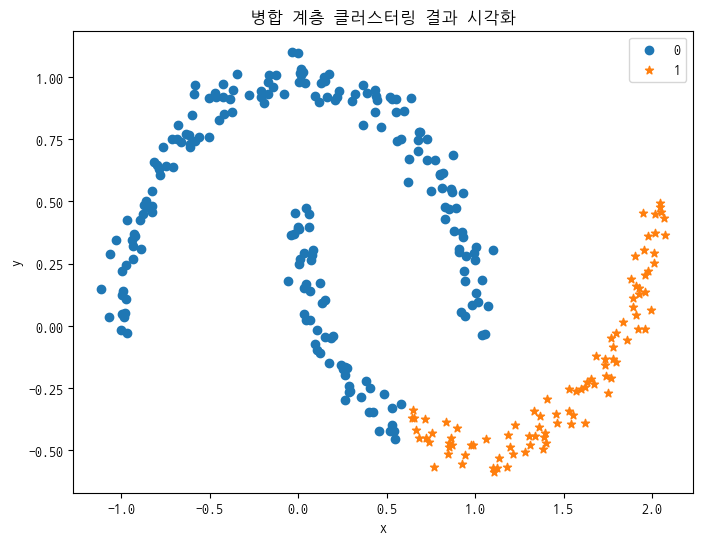

In [11]:
plt.figure(figsize=(8, 6))
markers = ['o', '*', '^', 'x', 's', 'v']

for i in set(x_train_df.cluster):
    df_index = x_train_df[x_train_df.cluster == i] # 클러스터링 결과 별로 데이터를 분할한다.
    x = df_index.x # 학습 데이터의 첫 번째 성분 벡터를 추출한다.
    y = df_index.y # 학습 데이터의 두 번째 성분 벡터를 추출한다.
    plt.scatter(x=x, y=y, marker=markers[i], label=i) # 산포도를 그린다.

plt.title('병합 계층 클러스터링 결과 시각화')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

가우시안 혼합 클러스터링 모델 생성 후 데이터 학습

In [12]:
from sklearn.mixture import GaussianMixture # 가우시안 혼합 클러스터링 알고리즘을 사용하기 위해 import 한다.
# n_components 속성에 클러스터링 개수를 지정해서 가우시안 혼합 클러스터링 모델을 만든다. 기본값은 1이다.
cluster = GaussianMixture(n_components=2, random_state=0)
# 학습 데이터로 병합 계층 클러스터링 모델을 학습시킨다.
cluster.fit(x_train)

GaussianMixture(n_components=2, random_state=0)

In [13]:
# 클러스터링 결과(레이블)를 확인한다.
# fit_predict() 메소드에 피쳐 데이터를 넘겨서 클러스터링 결과를 확인할 수 있다.
print(cluster.fit_predict(x_train))

[0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1
 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1
 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1
 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0
 0 1 0 1]


In [14]:
# 클러스터링된 데이터 시각화를 위해 데이터프레임을 만든다.
x_train_df = pd.DataFrame(x_train, columns=['x', 'y'])
x_train_df['label'] = y_train
x_train_df['cluster'] = cluster.fit_predict(x_train) # 데이터프레임에 클러스터링된 레이블을 넣어준다.
x_train_df

,x,y,label,cluster
0,0.831858,0.430931,0,0
1,0.115706,0.898050,0,0
2,-0.611459,0.729373,0,0
3,1.656398,-0.211761,1,1
4,0.262239,-0.299898,1,1
...,...,...,...,...
295,0.062868,0.447505,1,0
296,-0.859324,0.503234,0,0
297,0.935721,0.221339,0,1
298,-0.828297,0.455657,0,0


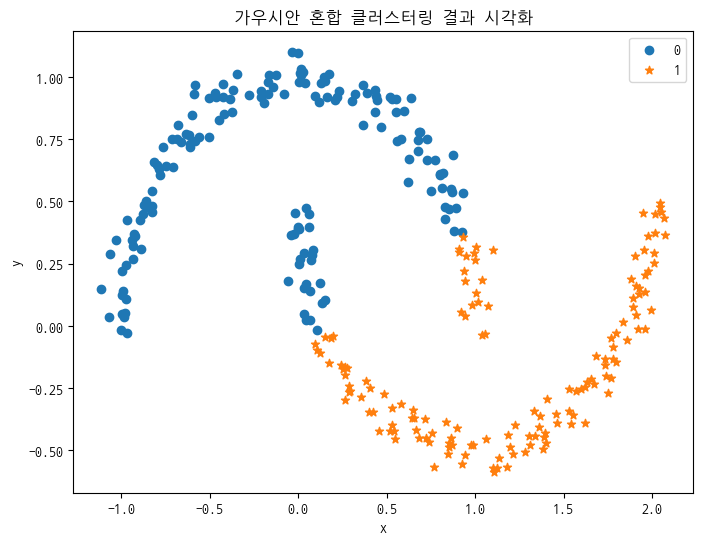

In [15]:
plt.figure(figsize=(8, 6))
markers = ['o', '*', '^', 'x', 's', 'v']

for i in set(x_train_df.cluster):
    df_index = x_train_df[x_train_df.cluster == i] # 클러스터링 결과 별로 데이터를 분할한다.
    x = df_index.x # 학습 데이터의 첫 번째 성분 벡터를 추출한다.
    y = df_index.y # 학습 데이터의 두 번째 성분 벡터를 추출한다.
    plt.scatter(x=x, y=y, marker=markers[i], label=i) # 산포도를 그린다.

plt.title('가우시안 혼합 클러스터링 결과 시각화')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

밀도 기반 클러스터링 모델 생성 후 데이터 학습

In [16]:
from sklearn.cluster import DBSCAN # 밀도 기반 클러스터링 알고리즘을 사용하기 위해 import 한다.
# min_samples 속성으로 일정 반경내에 최소한의 데이터 포인트 개수(기본값은 5)와 eps 속성으로 
# 데이터 포인트의 개수를 측정할 변경(기본값은 0.5)을 지정해서 밀도 기반 클러스터링 객체를 만든다.
cluster = DBSCAN(min_samples=5, eps=0.2)
# 학습 데이터로 병합 계층 클러스터링 모델을 학습시킨다.
cluster.fit(x_train)

DBSCAN(eps=0.2)

In [17]:
# 클러스터링 결과(레이블)를 확인한다.
# labels_ 속성으로 클러스터링 결과를 확인할 수 있다.
print(cluster.labels_)
# fit_predict() 메소드에 피쳐 데이터를 넘겨서 클러스터링 결과를 확인할 수 있다.
print(cluster.fit_predict(x_train))

[0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1
 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0
 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0
 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1
 0 0 0 1]
[0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1
 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0
 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 1 1 0 1 

밀도 기반 클러스터링 알고리즘으로 클러스터링된 데이터 시각화

In [18]:
# 클러스터링된 데이터 시각화를 위해 데이터프레임을 만든다.
x_train_df = pd.DataFrame(x_train, columns=['x', 'y'])
x_train_df['label'] = y_train
x_train_df['cluster'] = cluster.labels_ # 데이터프레임에 클러스터링된 레이블을 넣어준다.
x_train_df

,x,y,label,cluster
0,0.831858,0.430931,0,0
1,0.115706,0.898050,0,0
2,-0.611459,0.729373,0,0
3,1.656398,-0.211761,1,1
4,0.262239,-0.299898,1,1
...,...,...,...,...
295,0.062868,0.447505,1,1
296,-0.859324,0.503234,0,0
297,0.935721,0.221339,0,0
298,-0.828297,0.455657,0,0


In [19]:
# 레이블과 클러스터링된 레이블의 종류 확인
print(set(x_train_df.label), set(x_train_df.cluster))

{0, 1} {0, 1}


실제 데이터 레이블 시각화

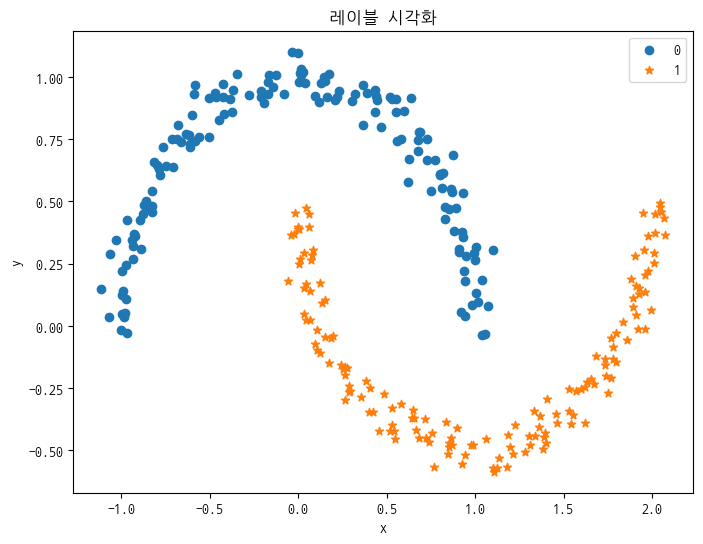

In [20]:
plt.figure(figsize=(8, 6))
markers = ['o', '*', '^', 'x', 's', 'v']

for i in set(x_train_df.label):
    df_index = x_train_df[x_train_df.label == i] # 데이터의 레이블 별로 데이터를 분할한다.
    x = df_index.x # 학습 데이터의 첫 번째 성분 벡터를 추출한다.
    y = df_index.y # 학습 데이터의 두 번째 성분 벡터를 추출한다.
    plt.scatter(x=x, y=y, marker=markers[i], label=i) # 산포도를 그린다.

plt.title('레이블 시각화')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

밀도 기반 계층 클러스터링 결과 시각화

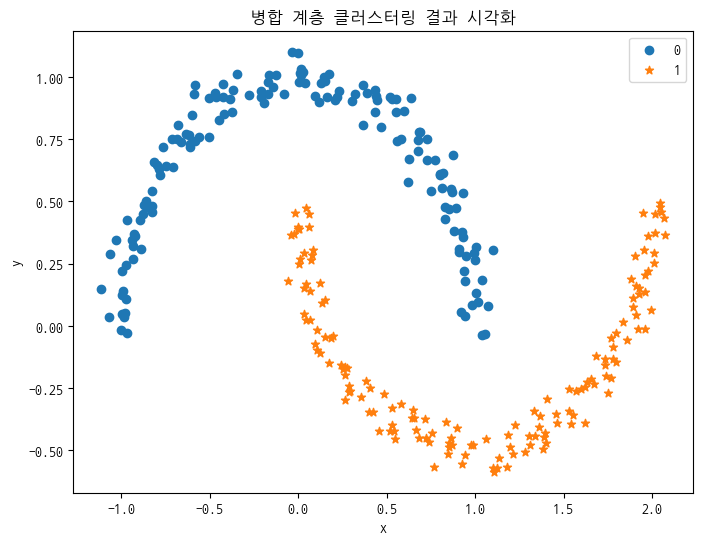

In [21]:
plt.figure(figsize=(8, 6))
markers = ['o', '*', '^', 'x', 's', 'v']

for i in set(x_train_df.cluster):
    df_index = x_train_df[x_train_df.cluster == i] # 클러스터링 결과 별로 데이터를 분할한다.
    x = df_index.x # 학습 데이터의 첫 번째 성분 벡터를 추출한다.
    y = df_index.y # 학습 데이터의 두 번째 성분 벡터를 추출한다.
    plt.scatter(x=x, y=y, marker=markers[i], label=i) # 산포도를 그린다.

plt.title('병합 계층 클러스터링 결과 시각화')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

학습된 모델을 평가한다

In [22]:
# silhouette_score() 메소드에 피쳐 데이터와 군집화 결과로 얻은 클러스터를 넘겨 실루엣 스코어를 평가한다.
sil_score = silhouette_score(x_train, cluster.labels_)
print(sil_score)

0.3260472493595187
